In [1]:
import pandas as pd

In [2]:
# load metadata

metadata = pd.read_csv('../data/l1/GLC24_PA_metadata_train.csv')
metadata

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212
...,...,...,...,...,...,...,...,...,...
1483632,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,53.0,3919655
1483633,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,5071.0,3919655
1483634,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,1889.0,3919655
1483635,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,10600.0,3919655


In [4]:
# get unique surveyIds and their lat/lon coordinates


coords = metadata[['surveyId', 'lon', 'lat']].drop_duplicates()
coords

,surveyId,lon,lat
0,212,3.099038,43.134956
16,222,9.884560,56.912140
21,243,8.256020,55.637050
35,324,-0.402590,43.505630
41,333,-0.517360,45.806430
...,...,...,...
1483581,3919553,10.327990,57.305850
1483592,3919592,15.003900,55.090170
1483596,3919620,8.935060,55.461500
1483608,3919640,17.252948,53.901434


/var/folders/zl/cd3hr9dn1lz7c18kq8r1dq3w0000gn/T/ipykernel_18266/2347881327.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


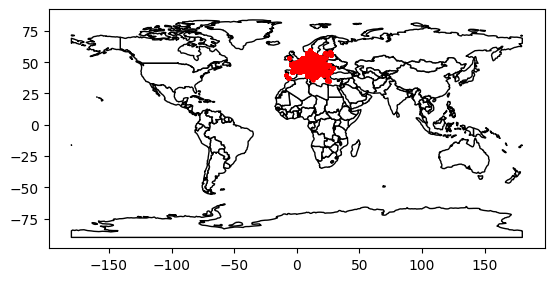

In [5]:
# create black and white map

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')

geometry = [Point(xy) for xy in zip(coords['lon'], coords['lat'])]
gdf = gpd.GeoDataFrame(coords, geometry=geometry)

gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.show()

/var/folders/zl/cd3hr9dn1lz7c18kq8r1dq3w0000gn/T/ipykernel_18266/142041719.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


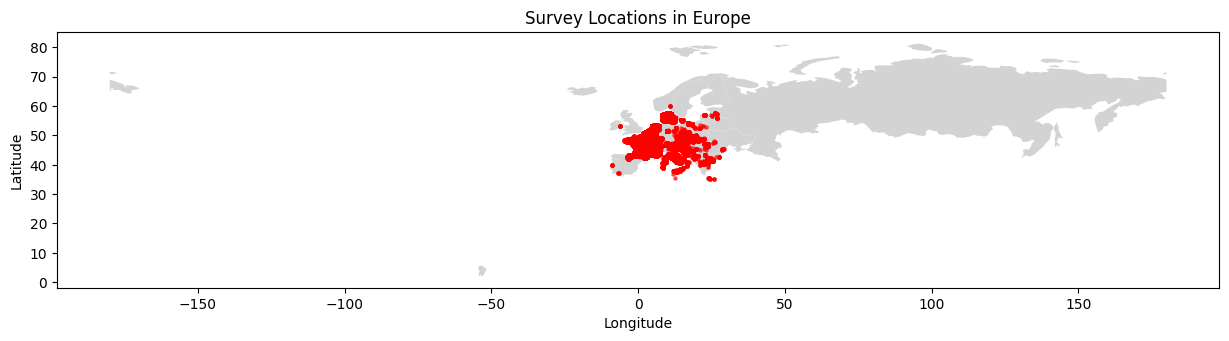

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(coords['lon'], coords['lat'])]
gdf = gpd.GeoDataFrame(coords, geometry=geometry)

# Load a map of Europe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[(world.continent == "Europe")]

# Plot the map
fig, ax = plt.subplots(figsize=(15, 15))
europe.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.6)
plt.title('Survey Locations in Europe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [6]:
from glob import glob
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import tqdm


sub_train_meta = metadata.drop_duplicates('surveyId').sample(n=1000, random_state=42)
sub_train_meta.index = range(len(sub_train_meta))

# Create Point geometry for training data
point_list = []
for i in tqdm.tqdm(range(len(sub_train_meta))):
    x, y = sub_train_meta.loc[i, ['lon', 'lat']]
    point_i = Point(x, y)
    point_list.append(point_i)

sub_train_meta['geometry'] = point_list

# Convert to GeoDataFrame
train_sub_meta_gdf = gpd.GeoDataFrame(sub_train_meta, geometry='geometry')
train_sub_meta_gdf.crs = {'init': 'epsg:4326'}
train_sub_meta_gdf.head()

# Create an interactive map
m = train_sub_meta_gdf.drop_duplicates(['lon', 'lat']).explore(color='green')

# Display the map
m


100%|██████████| 1000/1000 [00:00<00:00, 5657.32it/s]
/Users/mathisjander/opt/anaconda3/envs/clef2024/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
